# Features Engineering

In this notebook I'll create typical technical analysis features for ML models to be trained in.


In [2]:
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import ta

Populating the interactive namespace from numpy and matplotlib


[ta documentation](https://technical-analysis-library-in-python.readthedocs.io/en/latest/)

In [3]:
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange
from ta.momentum import UltimateOscillator
from ta.momentum import ROCIndicator
from ta.trend import IchimokuIndicator
from ta.trend import adx
from ta.trend import VortexIndicator

In [4]:
df = pd.read_csv('EURUSD_D1.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2014-12-26,1.22075,1.22218,1.21686,1.21777,46525
2014-12-28,1.21792,1.21804,1.21672,1.21682,5836
2014-12-29,1.21682,1.22210,1.21429,1.21533,95531
2014-12-30,1.21535,1.21873,1.21239,1.21613,106543
2014-12-31,1.21613,1.21697,1.20968,1.20976,73334
...,...,...,...,...,...
2021-05-14,1.20768,1.21477,1.20708,1.21420,97541
2021-05-16,1.21450,1.21511,1.21368,1.21498,2803
2021-05-17,1.21497,1.21687,1.21259,1.21563,81158


## Bollinger Bands

In [5]:
indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2, fillna=True)
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm
date,,,,,,,,
2014-12-26,1.22075,1.22218,1.21686,1.21777,46525,1.217770,1.217770,1.217770
2014-12-28,1.21792,1.21804,1.21672,1.21682,5836,1.218245,1.216345,1.217295
2014-12-29,1.21682,1.22210,1.21429,1.21533,95531,1.218648,1.214632,1.216640
2014-12-30,1.21535,1.21873,1.21239,1.21613,106543,1.218307,1.214718,1.216512
2014-12-31,1.21613,1.21697,1.20968,1.20976,73334,1.220797,1.209527,1.215162
...,...,...,...,...,...,...,...,...
2021-05-14,1.20768,1.21477,1.20708,1.21420,97541,1.218866,1.198410,1.208638
2021-05-16,1.21450,1.21511,1.21368,1.21498,2803,1.219337,1.199294,1.209316
2021-05-17,1.21497,1.21687,1.21259,1.21563,81158,1.220021,1.199235,1.209628


In [6]:
#df = dropna(df)
#df

## Volatility
Average True Range (ATR)

The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

In [7]:
ATR_10 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=10,fillna=True)
ATR_20 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=20,fillna=True)
ATR_40 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=40,fillna=True)
ATR_60 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=160,fillna=True)
ATR_120 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=120,fillna=True)

In [8]:
df['ATR_10'] = ATR_10.average_true_range()
df['ATR_20'] = ATR_20.average_true_range()
df['ATR_40'] = ATR_40.average_true_range()
df['ATR_60'] = ATR_60.average_true_range()
df['ATR_120'] = ATR_120.average_true_range()
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,ATR_40,ATR_60,ATR_120
date,,,,,,,,,,,,,
2014-12-26,1.22075,1.22218,1.21686,1.21777,46525,1.217770,1.217770,1.217770,0.0,0.0,0.0,0.0,0.0
2014-12-28,1.21792,1.21804,1.21672,1.21682,5836,1.218245,1.216345,1.217295,0.0,0.0,0.0,0.0,0.0
2014-12-29,1.21682,1.22210,1.21429,1.21533,95531,1.218648,1.214632,1.216640,0.0,0.0,0.0,0.0,0.0
2014-12-30,1.21535,1.21873,1.21239,1.21613,106543,1.218307,1.214718,1.216512,0.0,0.0,0.0,0.0,0.0
2014-12-31,1.21613,1.21697,1.20968,1.20976,73334,1.220797,1.209527,1.215162,0.0,0.0,0.0,0.0,0.0


In [9]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,ATR_40,ATR_60,ATR_120
date,,,,,,,,,,,,,
2021-05-14,1.20768,1.21477,1.20708,1.21420,97541,1.218866,1.198410,1.208638,0.006188,0.005954,0.005941,0.006364,0.006289
2021-05-16,1.21450,1.21511,1.21368,1.21498,2803,1.219337,1.199294,1.209316,0.005712,0.005728,0.005828,0.006333,0.006248
2021-05-17,1.21497,1.21687,1.21259,1.21563,81158,1.220021,1.199235,1.209628,0.005569,0.005656,0.005790,0.006320,0.006232
2021-05-18,1.21561,1.22339,1.21534,1.22223,95068,1.222036,1.198551,1.210294,0.005817,0.005775,0.005846,0.006331,0.006247
2021-05-19,1.22225,1.22451,1.22002,1.22069,45680,1.223452,1.198411,1.210932,0.005684,0.005711,0.005812,0.006319,0.006233


## Momentum

In [10]:
#UltimateOscillator


The **Rate-of-Change (ROC)** indicator, which is also referred to as simply Momentum, is a pure momentum oscillator that measures the percent change in price from one period to the next. The ROC calculation compares the current price with the price “n” periods ago. 

In [11]:
ROCI_10 = ta.momentum.ROCIndicator(df['close'], window=10, fillna=True)
ROCI_20 = ta.momentum.ROCIndicator(df['close'], window=20, fillna=True)
ROCI_40 = ta.momentum.ROCIndicator(df['close'], window=40, fillna=True)
ROCI_60 = ta.momentum.ROCIndicator(df['close'], window=60, fillna=True)
ROCI_120 = ta.momentum.ROCIndicator(df['close'], window=120, fillna=True)

In [12]:
df["ROCI_10"] = ROCI_10.roc()
df["ROCI_20"] = ROCI_20.roc()
df["ROCI_40"] = ROCI_40.roc()
df["ROCI_60"] = ROCI_60.roc()
df["ROCI_120"] = ROCI_120.roc()

# Trend

In [13]:
'''
ADX_5 = adx(high=df['high'],low=df['low'], close=df['close'], window=5, fillna=True)
ADX_10 = adx(high=df.high, low=df.low, close=df.close, window=10, fillna=True)
ADX_20 = adx(high=df.high, low=df.low, close=df.close, window=20, fillna=True)
ADX_40 = adx(high=df.high, low=df.low, close=df.close, window=45, fillna=True)
'''

"\nADX_5 = adx(high=df['high'],low=df['low'], close=df['close'], window=5, fillna=True)\nADX_10 = adx(high=df.high, low=df.low, close=df.close, window=10, fillna=True)\nADX_20 = adx(high=df.high, low=df.low, close=df.close, window=20, fillna=True)\nADX_40 = adx(high=df.high, low=df.low, close=df.close, window=45, fillna=True)\n"

In [14]:
VI = VortexIndicator(high=df['high'],low=df['low'], close=df['close'], window=30, fillna=True)

In [15]:
df['Vortex_diff'] = VI.vortex_indicator_diff()
df['Vortex_neg'] = VI.vortex_indicator_neg()
df['Vortex_pos'] = VI. vortex_indicator_pos()

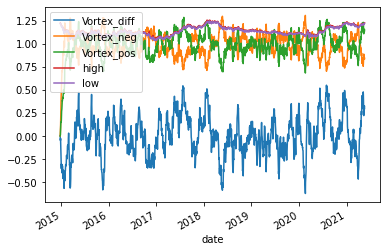

In [16]:
df["Vortex_diff"].plot()
df["Vortex_neg"].plot()
df["Vortex_pos"].plot()
#df["ichimoku_cl"].plot()
df['high'].plot()
df['low'].plot()
plt.legend(loc='upper left')
pylab.show()

In [17]:
Ichimoku = IchimokuIndicator(high=df['high'],low=df['low'],window1=9,window2=26,window3=52,fillna=True)

In [18]:

df["ichimoku_a"] = Ichimoku.ichimoku_a()
df['ichimoku_b'] = Ichimoku.ichimoku_b()
df['ichimoku_bl'] = Ichimoku.ichimoku_base_line()
df['ichimoku_cl'] = Ichimoku.ichimoku_conversion_line()


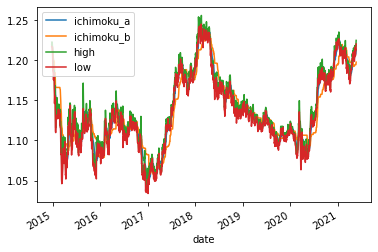

In [19]:

df["ichimoku_a"].plot()
df["ichimoku_b"].plot()
#df["ichimoku_bl"].plot()
#df["ichimoku_cl"].plot()
df['high'].plot()
df['low'].plot()
plt.legend(loc='upper left')
pylab.show()


## Column for classification

In [20]:
close_price = df["close"].values.tolist()
close_Y = [0]
for i in range(1, len(close_price)):
    if close_price[i] > close_price[i - 1]:
        close_Y.append(1)
    else:       
        close_Y.append(0)

df['close_change'] = close_Y

## Summary

In [21]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,...,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl,close_change
date,,,,,,,,,,,,,,,,,,,,,
2021-05-14,1.20768,1.21477,1.20708,1.21420,97541,1.218866,1.198410,1.208638,0.006188,0.005954,...,1.923981,-0.328353,0.253585,0.859779,1.113364,1.207283,1.194275,1.206195,1.208370,1
2021-05-16,1.21450,1.21511,1.21368,1.21498,2803,1.219337,1.199294,1.209316,0.005712,0.005728,...,1.874010,-0.347763,0.290213,0.848255,1.138468,1.207458,1.194275,1.206195,1.208720,1
2021-05-17,1.21497,1.21687,1.21259,1.21563,81158,1.220021,1.199235,1.209628,0.005569,0.005656,...,2.577885,-0.389223,0.297348,0.846376,1.143724,1.208920,1.194275,1.206195,1.211645,1
2021-05-18,1.21561,1.22339,1.21534,1.22223,95068,1.222036,1.198551,1.210294,0.005817,0.005775,...,2.736893,0.022096,0.325997,0.829822,1.155820,1.211540,1.196895,1.208815,1.214265,1
2021-05-19,1.22225,1.22451,1.22002,1.22069,45680,1.223452,1.198411,1.210932,0.005684,0.005711,...,2.370809,-0.367290,0.296956,0.842564,1.139520,1.213187,1.197455,1.211550,1.214825,0


In [22]:
df.describe()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,...,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl,close_change
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.135927,1.139669,1.132319,1.135968,2.406459e+05,1.152301,1.119612,1.135957,0.007390,0.007362,...,0.164695,0.517622,-0.000482,0.986936,0.986454,1.136495,1.136894,1.136646,1.136344,0.508000
std,0.045784,0.045607,0.045904,0.045776,2.351853e+05,0.044386,0.046866,0.044817,0.002435,0.002269,...,3.060168,3.949375,0.214930,0.119276,0.134464,0.044329,0.042481,0.043984,0.045104,0.500061
min,1.039070,1.041780,1.034030,1.039060,3.000000e+00,1.057385,1.029219,1.046509,0.000000,0.000000,...,-12.811632,-8.559317,-0.623900,0.000000,0.000000,1.049317,1.058455,1.050515,1.042580,0.000000
25%,1.103368,1.107475,1.100343,1.103372,1.340180e+05,1.120166,1.083445,1.105034,0.005888,0.006120,...,-1.518185,-2.073725,-0.136742,0.920891,0.925557,1.106051,1.106555,1.106555,1.104244,0.000000
50%,1.127750,1.132030,1.123410,1.127740,2.072280e+05,1.143532,1.112688,1.125244,0.006948,0.007001,...,0.000000,-0.050028,-0.004543,0.995023,0.995077,1.127180,1.125945,1.128100,1.127425,1.000000
75%,1.173705,1.176967,1.169567,1.173710,2.663812e+05,1.187739,1.157735,1.172986,0.008479,0.008394,...,1.990998,3.318426,0.136946,1.057925,1.061158,1.171990,1.170680,1.171680,1.172697,1.000000
max,1.251070,1.255530,1.244780,1.251050,2.979097e+06,1.255589,1.224983,1.238501,0.017193,0.014255,...,8.429080,12.954019,0.549553,1.305415,1.284372,1.239393,1.235495,1.238035,1.243615,1.000000


Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений.

In [23]:
df.count()

open            2000
high            2000
low             2000
close           2000
volume          2000
bb_bbh          2000
bb_bbl          2000
bb_bbm          2000
ATR_10          2000
ATR_20          2000
ATR_40          2000
ATR_60          2000
ATR_120         2000
ROCI_10         2000
ROCI_20         2000
ROCI_40         2000
ROCI_60         2000
ROCI_120        2000
Vortex_diff     2000
Vortex_neg      2000
Vortex_pos      2000
ichimoku_a      2000
ichimoku_b      2000
ichimoku_bl     2000
ichimoku_cl     2000
close_change    2000
dtype: int64

In [24]:
#df.fillna(0,inplace = True) #заполняем пропуски

## Plots

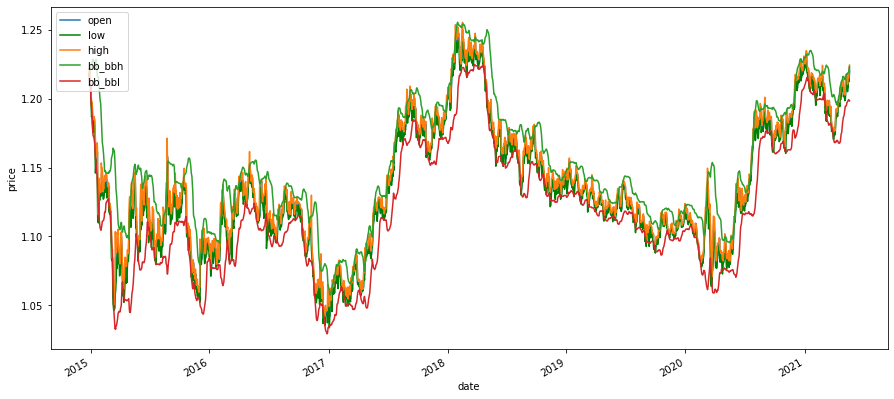

In [25]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
df.bb_bbh.plot()
df.bb_bbl.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

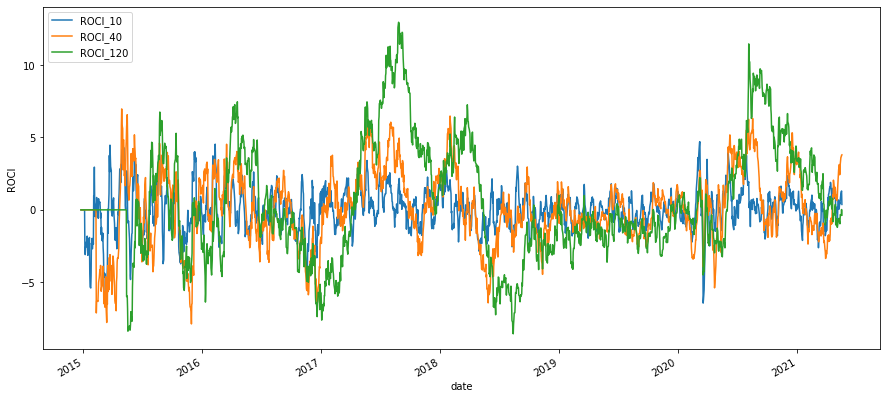

In [26]:
plt.figure(figsize(15,7))
df.ROCI_10.plot()
#df.ROCI_20.plot()
df.ROCI_40.plot()
df.ROCI_120.plot()
plt.ylabel('ROCI')
plt.legend(loc='upper left')
pylab.show()

Text(0, 0.5, 'ATR')

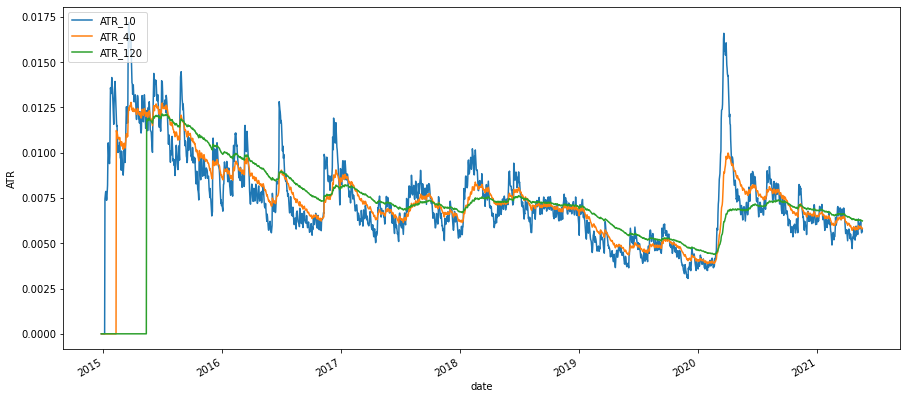

In [27]:
df.ATR_10.plot()
df.ATR_40.plot()
df.ATR_120.plot()
plt.legend(loc='upper left')
plt.ylabel('ATR')

In [28]:
buffer = buffer = df['close'].rolling(5).mean()
buffer

date
2014-12-26         NaN
2014-12-28         NaN
2014-12-29         NaN
2014-12-30         NaN
2014-12-31    1.215162
                ...   
2021-05-14    1.211618
2021-05-16    1.211804
2021-05-17    1.212050
2021-05-18    1.214942
2021-05-19    1.217546
Name: close, Length: 2000, dtype: float64

In [29]:
df['close'].rolling(20).mean()

date
2014-12-26         NaN
2014-12-28         NaN
2014-12-29         NaN
2014-12-30         NaN
2014-12-31         NaN
                ...   
2021-05-14    1.208638
2021-05-16    1.209316
2021-05-17    1.209628
2021-05-18    1.210294
2021-05-19    1.210932
Name: close, Length: 2000, dtype: float64

In [30]:
columns_list = df.columns
data = pd.DataFrame(data={'close' : df['close'], 'close_change' : df['close_change']},
                    index=df.index[20:])#df.index[20:])
for column in columns_list:
    if column == "close" or column == "close_change":
        continue
    data[str(column)] = df[str(column)].rolling(20).mean()
data.drop(data.index[1:120], inplace=True)

In [31]:
data.head()

,close,close_change,open,high,low,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,...,ROCI_40,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl
date,,,,,,,,,,,,,,,,,,,,,
2015-01-19,1.15947,1,1.190209,1.192707,1.183859,125293.70,1.224872,1.182937,1.203905,0.005052,...,0.000000,0.000000,0.000000,-0.292063,0.566607,0.274544,1.199552,1.202186,1.202186,1.196918
2015-06-08,1.12800,1,1.109747,1.115922,1.103201,178572.05,1.148248,1.085201,1.116725,0.011961,...,3.059706,3.102878,-6.589708,0.134893,0.930980,1.065874,1.113431,1.099360,1.111859,1.115003
2015-06-09,1.12926,1,1.108914,1.115403,1.102083,189387.35,1.147392,1.085082,1.116237,0.012098,...,2.952450,3.084663,-6.401610,0.114822,0.941023,1.055845,1.113217,1.099360,1.112258,1.114176
2015-06-10,1.13099,1,1.108156,1.115101,1.101890,191876.60,1.146536,1.084730,1.115633,0.012210,...,2.897022,3.109756,-6.191681,0.093968,0.952233,1.046201,1.113011,1.099360,1.112656,1.113366
2015-06-11,1.12458,0,1.108085,1.115129,1.102208,190246.55,1.145869,1.084101,1.114985,0.012281,...,2.946539,3.079194,-5.817274,0.076014,0.961502,1.037516,1.112856,1.099360,1.113054,1.112659


In [32]:
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,...,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl,close_change
date,,,,,,,,,,,,,,,,,,,,,
2014-12-26,1.22075,1.22218,1.21686,1.21777,46525,1.217770,1.217770,1.217770,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.219520,1.219520,1.219520,1.219520,0
2014-12-28,1.21792,1.21804,1.21672,1.21682,5836,1.218245,1.216345,1.217295,0.0,0.0,...,0.0,0.0,-0.048896,0.062377,0.013481,1.219450,1.219450,1.219450,1.219450,0
2014-12-29,1.21682,1.22210,1.21429,1.21533,95531,1.218648,1.214632,1.216640,0.0,0.0,...,0.0,0.0,-0.027795,0.096600,0.068805,1.218235,1.218235,1.218235,1.218235,0
2014-12-30,1.21535,1.21873,1.21239,1.21613,106543,1.218307,1.214718,1.216512,0.0,0.0,...,0.0,0.0,-0.077890,0.186071,0.108181,1.217285,1.217285,1.217285,1.217285,1
2014-12-31,1.21613,1.21697,1.20968,1.20976,73334,1.220797,1.209527,1.215162,0.0,0.0,...,0.0,0.0,-0.113699,0.256672,0.142973,1.215930,1.215930,1.215930,1.215930,0


In [35]:
import seaborn as sns
#import imgkit

In [36]:
table = data.describe()
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = table.style.background_gradient(cmap=cm)
#html = styled_table.render()

In [37]:
styled_table

,close,close_change,open,high,low,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,ATR_40,ATR_60,ATR_120,ROCI_10,ROCI_20,ROCI_40,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,1.137301,0.513165,1.136678,1.140281,1.133227,247352.764938,1.151753,1.120860,1.136307,0.007145,0.007178,0.007243,0.007398,0.007467,0.051917,0.096330,0.201518,0.325033,0.600282,0.008612,0.989600,0.998212,1.136981,1.136674,1.137046,1.136916
std,0.045937,0.499961,0.044869,0.044782,0.044962,177030.216417,0.043913,0.045657,0.044377,0.001984,0.001871,0.001773,0.001824,0.001719,0.759055,1.329726,2.070721,2.687092,3.889263,0.178972,0.090260,0.091438,0.043918,0.042233,0.043528,0.044558
min,1.039060,0.000000,1.046368,1.050833,1.042300,70544.650000,1.063999,1.033494,1.049710,0.003465,0.000893,0.000000,0.000000,0.000000,-2.520144,-4.100992,-5.456526,-5.573180,-6.660669,-0.481200,0.566607,0.274544,1.053186,1.058455,1.053107,1.048650
25%,1.105430,0.000000,1.105618,1.108874,1.102606,157759.300000,1.120490,1.087066,1.106093,0.006008,0.006159,0.006385,0.006597,0.006773,-0.375244,-0.728805,-1.083997,-1.316427,-1.959501,-0.109470,0.926543,0.941164,1.107166,1.107044,1.107712,1.106610
50%,1.128650,1.000000,1.125398,1.129695,1.122111,196915.750000,1.142256,1.112951,1.125060,0.006848,0.006923,0.007076,0.007195,0.007204,-0.050939,-0.031478,0.001030,-0.082527,-0.540908,0.002001,0.997180,0.996857,1.127180,1.125801,1.127121,1.126666
75%,1.174750,1.000000,1.173848,1.177069,1.170567,255889.600000,1.187622,1.158872,1.173060,0.008210,0.008110,0.008033,0.008037,0.007931,0.506063,0.939596,1.533723,2.146751,3.522656,0.133248,1.053384,1.061940,1.172991,1.171853,1.172379,1.173854
max,1.251050,1.000000,1.238331,1.243405,1.233477,1033664.450000,1.253492,1.223170,1.236226,0.014572,0.012660,0.012469,0.012013,0.012060,2.167878,3.738884,5.163294,7.121614,11.542050,0.457165,1.233709,1.223558,1.235739,1.235495,1.236768,1.238660


In [38]:
columns_list

Index(['open', 'high', 'low', 'close', 'volume', 'bb_bbh', 'bb_bbl', 'bb_bbm',
       'ATR_10', 'ATR_20', 'ATR_40', 'ATR_60', 'ATR_120', 'ROCI_10', 'ROCI_20',
       'ROCI_40', 'ROCI_60', 'ROCI_120', 'Vortex_diff', 'Vortex_neg',
       'Vortex_pos', 'ichimoku_a', 'ichimoku_b', 'ichimoku_bl', 'ichimoku_cl',
       'close_change'],
      dtype='object')

## Saving the data

In [ ]:
data.to_csv('data_ML_19_05.csv')